In [10]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

import copy
import random
import os
import gc

In [2]:
def set_seed(seed = 0):
    np.random.seed(seed)
    random_state = np.random.RandomState(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    return random_state

seed=912
random_state = set_seed(seed)

### create evaluation map of models and datasets

In [3]:
evaluation_map_lvl1 = dict()
evaluation_map_lvl1['model_lvl1_0_blend'] = ('../data/classifier_models/pycaret_classification/lvl1/t0_blend_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_0.csv', 'dev_1')
evaluation_map_lvl1['model_lvl1_1_blend'] = ('../data/classifier_models/pycaret_classification/lvl1/t1_blend_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_1.csv', 'dev_1')
evaluation_map_lvl1['model_lvl1_5_blend'] = ('../data/classifier_models/pycaret_classification/lvl1/t5_blend_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_5.csv', 'dev_1')
evaluation_map_lvl1['model_lvl1_6_blend'] = ('../data/classifier_models/pycaret_classification/lvl1/t6_blend_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_6.csv', 'dev_1')
evaluation_map_lvl1['model_lvl1_8_blend'] = ('../data/classifier_models/pycaret_classification/lvl1/t8_blend_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_8.csv', 'dev_1')
evaluation_map_lvl1['model_lvl1_0_stack'] = ('../data/classifier_models/pycaret_classification/lvl1/t0_stack_estimator', '../data/classifier_training_data/lvl1_training/emb_dl_0.csv', 'dev_1')


evaluation_map_lvl2 = dict()
evaluation_map_lvl2['model_lvl2_0_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t0_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_0.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_2_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t2_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_2.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_3_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t3_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_3.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_4_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t4_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_4.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_5_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t5_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_5.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_6_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t6_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_6.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_7_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t7_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_7.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_8_blend'] = ('../data/classifier_models/pycaret_classification/lvl2/t8_blend_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_8.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_0_stack'] = ('../data/classifier_models/pycaret_classification/lvl2/t0_stack_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_0.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_5_stack'] = ('../data/classifier_models/pycaret_classification/lvl2/t5_stack_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_5.csv', 'dev_2')
evaluation_map_lvl2['model_lvl2_8_stack'] = ('../data/classifier_models/pycaret_classification/lvl2/t8_stack_estimator', '../data/classifier_training_data/lvl2_training/emb_dl_8.csv', 'dev_2')


### Evaluation loop

In [6]:
def get_test_data(df, class_labels):
    train, test = train_test_split(df, test_size=0.30, random_state=random_state)
    X_test = copy.deepcopy(test)
    X_test.drop(columns=[class_labels], axis=1, inplace=True)
    y_test = copy.deepcopy(test[class_labels])
    return (X_test, y_test)

def get_accuracy(model, df, class_labels):
    X_test, y_test = get_test_data(df, class_labels)
    y_pred = predict_model(estimator=model, data=X_test)
    accuracy = accuracy_score(y_test, y_pred.Label.values)
    return accuracy

def get_n_scores_as_df(model_dataset_map, n):
    return_map = dict()
    for k, v in tqdm(model_dataset_map.items(), total=len(model_dataset_map)):
        model = load_model(v[0])
        df = pd.read_csv(v[1], low_memory=False)
        class_labels = v[2]
        scores = list()
        for i in range(n):
            scores.append(get_accuracy(model, df, class_labels))
        return_map[k] = scores
    gc.collect()
    return pd.DataFrame(return_map)

In [7]:
results_df_1 = get_n_scores_as_df(evaluation_map_lvl1, 100)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded



In [8]:
results_df_2 = get_n_scores_as_df(evaluation_map_lvl2, 100)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded



## PLot Analysis

#### For lvl1 classification problem we cannot combine different models over voting because majority of the models are under perfoming compared to the best model, 5.

#### For lvl2 classification problem we can combine 0, 5 and 6 models.

Text(0.5, 0, 'Model Accuracy')

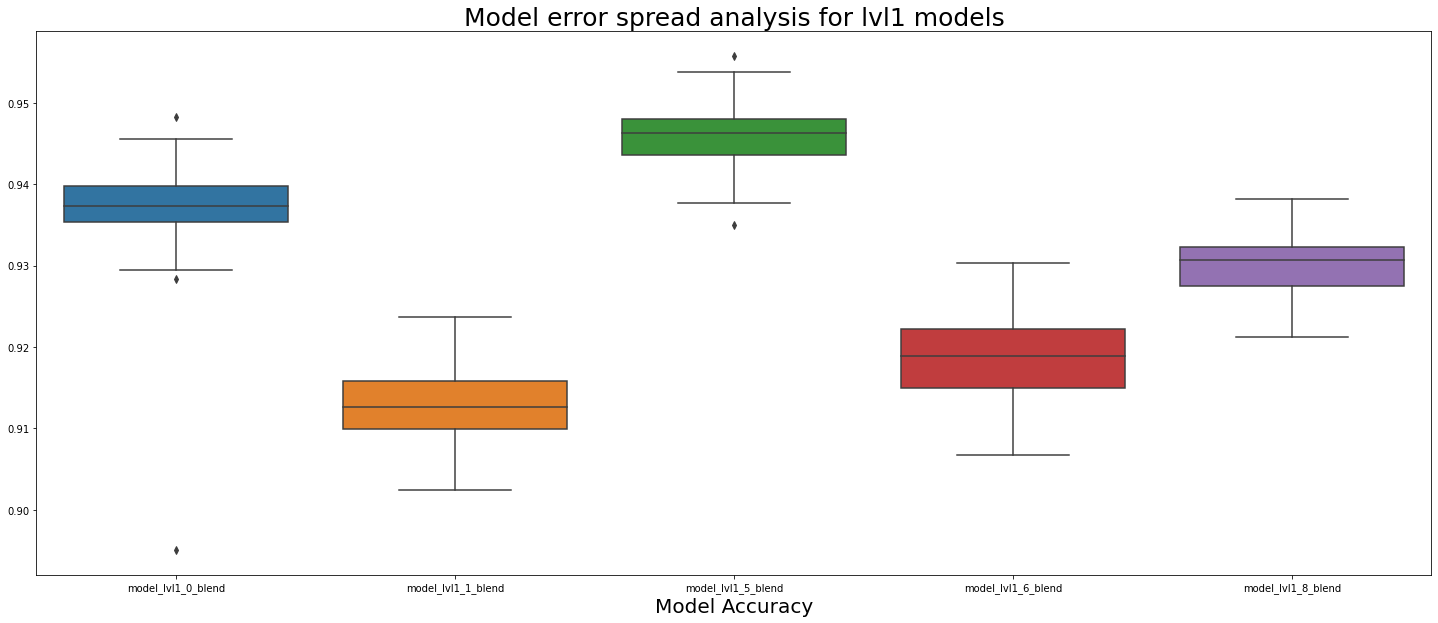

In [20]:
plt.figure(figsize = (25, 10))
sns.boxplot(data=results_df_1.iloc[:, 0:5])
title = "Model error spread analysis for lvl1 models"
plt.title(title, size=25)
plt.xlabel("Model Accuracy", size=20)

Text(0.5, 0, 'Model Accuracy')

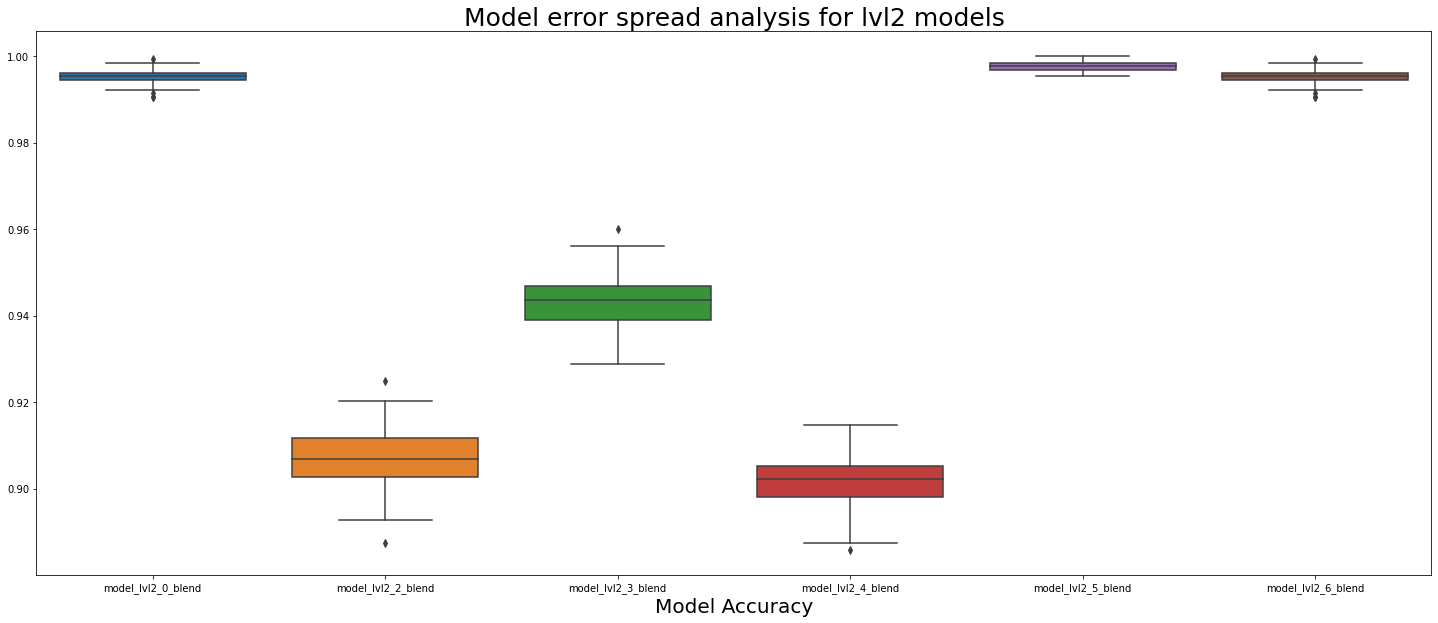

In [13]:
plt.figure(figsize = (25, 10))
sns.boxplot(data=results_df_2.iloc[:, 0:6])
title = "Model error spread analysis for lvl2 models"
plt.title(title, size=25)
plt.xlabel("Model Accuracy", size=20)

### Blend VS Stack analysis

Text(0.5, 0, 'Model Accuracy')

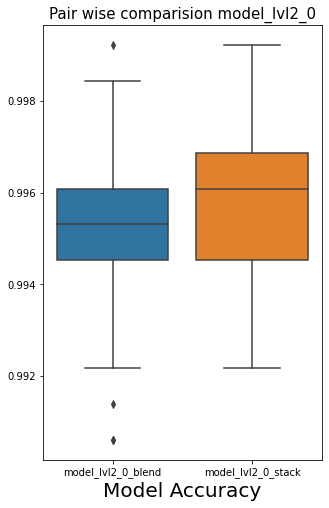

In [17]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df_2[['model_lvl2_0_blend', 'model_lvl2_0_stack']])
title = "Pair wise comparision model_lvl2_0"
plt.title(title, size=15)
plt.xlabel("Model Accuracy", size=20)

### Select model_lvl2_0_stack

Text(0.5, 0, 'Model Accuracy')

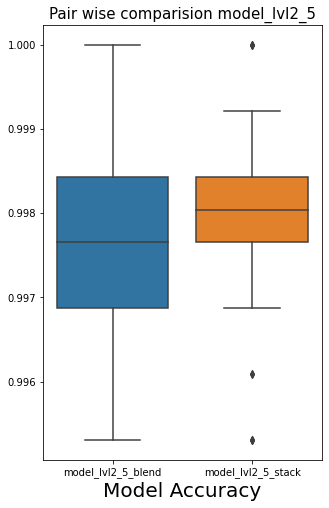

In [18]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df_2[['model_lvl2_5_blend', 'model_lvl2_5_stack']])
title = "Pair wise comparision model_lvl2_5"
plt.title(title, size=15)
plt.xlabel("Model Accuracy", size=20)

### Select model_lvl2_5_stack

Text(0.5, 0, 'Model Accuracy')

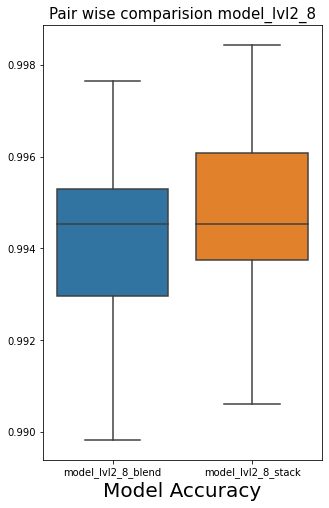

In [19]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df_2[['model_lvl2_8_blend', 'model_lvl2_8_stack']])
title = "Pair wise comparision model_lvl2_8"
plt.title(title, size=15)
plt.xlabel("Model Accuracy", size=20)

### Select model_lvl2_8_stack

# Output

## lvl1 classifier 5_blend

## lvl2 classifier 0_stack, 5_stack and 8_stack using majority voting